# Abalone Case Study

### Importing Libraries

In [251]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Loading the Dataset

In [252]:
df=pd.read_csv("abalone.csv")
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Here, our target variable is Rings. Using this dataset, we have to predict the number of rings for an abalone which will lead us to the age of abalone. Number of rings + 1.5 gives the age in years.

In [253]:
#checking the shape of the dataset
df.shape

(4177, 9)

In this dataset, we have 4177 rows and 9 including the target variable.

In [254]:
#checking the datatypes of all the columns
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [255]:
#checking the missing values
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

We have no missing values in our dataset.

In [256]:
#checking the range for target variable "Rings"
df["Rings"].value_counts(sort=True)

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

Here we see that, Ring values ranges from 1 to 29.

In [257]:
#checking the unique values for "Sex" column
df["Sex"].unique()

array(['M', 'F', 'I'], dtype=object)

In [258]:
#checking the count for each unique value of "Sex"
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In the sex feature, we have Males => 1528, Females => 1307 and Infant => 1342.

([<matplotlib.patches.Wedge at 0x2187c5a5880>,
 [Text(0.45010440780275796, 1.0036961801643607, 'Male'),
  Text(-1.0848393519507589, -0.18199884741134378, 'Infant'),
  Text(0.6099659291018239, -0.9153914820091724, 'Female')],
 [Text(0.24551149516514065, 0.5474706437260148, '36.58%'),
  Text(-0.5917305556095048, -0.09927209858800569, '32.13%'),
  Text(0.3327086886009948, -0.49930444473227575, '31.29%')])

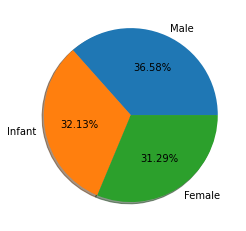

In [259]:
#Pie Chart for the graphical representation of Classes
labels='Male','Infant','Female'

fig,ax=plt.subplots()
ax.pie(df['Sex'].value_counts(),labels=labels,autopct='%1.2f%%',shadow=True)

This shows that the Sex feature is almost equally balanced.

In [260]:
#checking the statistical data
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# EDA

## Univariate Analysis

#### First analyzing the distribution of the target attribute: Rings.

<AxesSubplot:xlabel='Rings'>

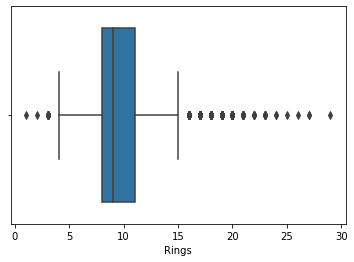

In [261]:
sns.boxplot(df['Rings'])

<AxesSubplot:xlabel='Rings', ylabel='Density'>

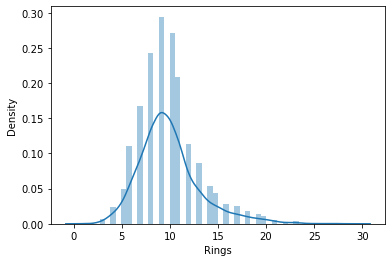

In [262]:
sns.distplot(df["Rings"])

<AxesSubplot:xlabel='Rings'>

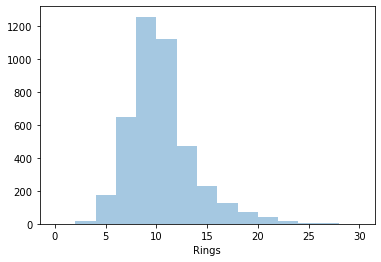

In [263]:
sns.distplot(df["Rings"],kde=False, bins=range(0, 31, 2))

The analysis shows that the Ring attribute values ranges from 1 to 29 rings on an abalone specimen. However, the most frequent values of Rings are highly concentrated around the median of the distribution. Approximately its a normal curve distribution with few extreme outliers.

#### Secondly analyzing the dimensional attributes: Length,Diameter,Height.

<AxesSubplot:xlabel='Height', ylabel='Density'>

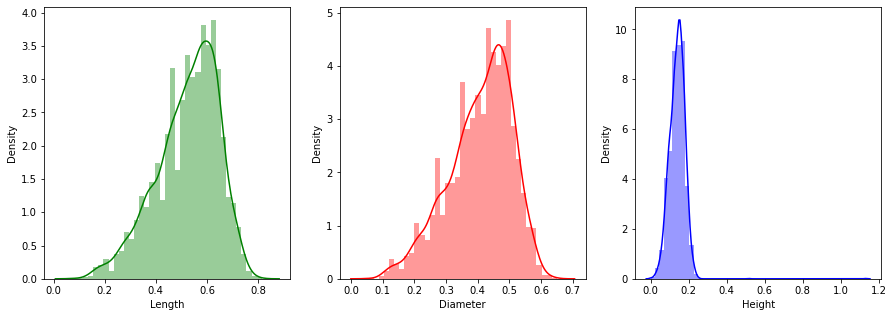

In [264]:
plt.figure(figsize=(15,5))

rows=1
cols=3
ind=1
plt.subplot(rows,cols, ind)
sns.distplot(df['Length'],color="g")
    
ind+=1
plt.subplot(rows,cols, ind)
sns.distplot(df['Diameter'],color="r")

ind+=1
plt.subplot(rows,cols, ind)
sns.distplot(df['Height'],color="b")

<AxesSubplot:xlabel='Height'>

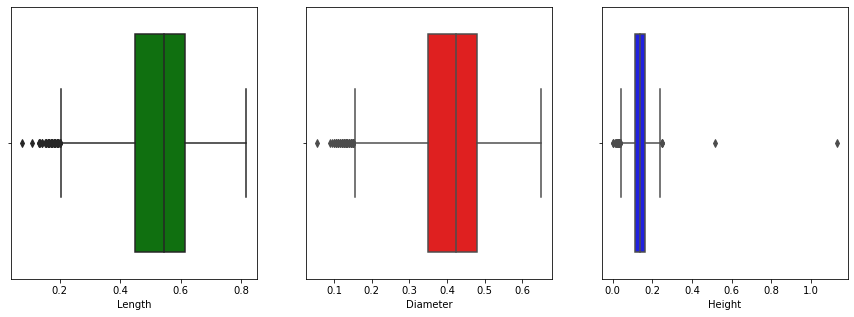

In [265]:
plt.figure(figsize=(15,5))

rows=1
cols=3
ind=1
plt.subplot(rows,cols,ind)
sns.boxplot(df['Length'],color="g")
    
ind+=1
plt.subplot(rows,cols, ind)
sns.boxplot(df['Diameter'],color="r")

ind+=1
plt.subplot(rows,cols, ind)
sns.boxplot(df['Height'],color="b")

<AxesSubplot:xlabel='Height'>

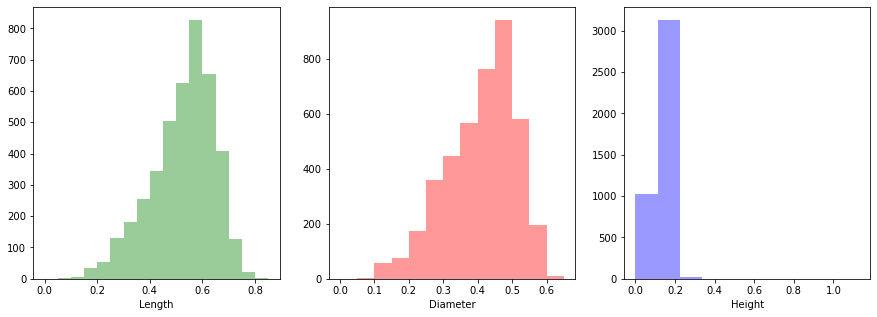

In [266]:
plt.figure(figsize=(15,5))

rows=1
cols=3
ind=1
plt.subplot(rows,cols,ind)
sns.distplot(df['Length'],color="g",kde=False,bins=np.arange(0.0, 0.9, 0.05))
    
ind+=1
plt.subplot(rows,cols, ind)
sns.distplot(df['Diameter'],color="r",kde=False,bins=np.arange(0.0, 0.7, 0.05))

ind+=1
plt.subplot(rows,cols, ind)
sns.distplot(df['Height'],color="b",kde=False,bins=10)

#### Thirdly analyzing the Weight attributes: Shucked weight, Viscera weight, Shell weight, Whole weight,.

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

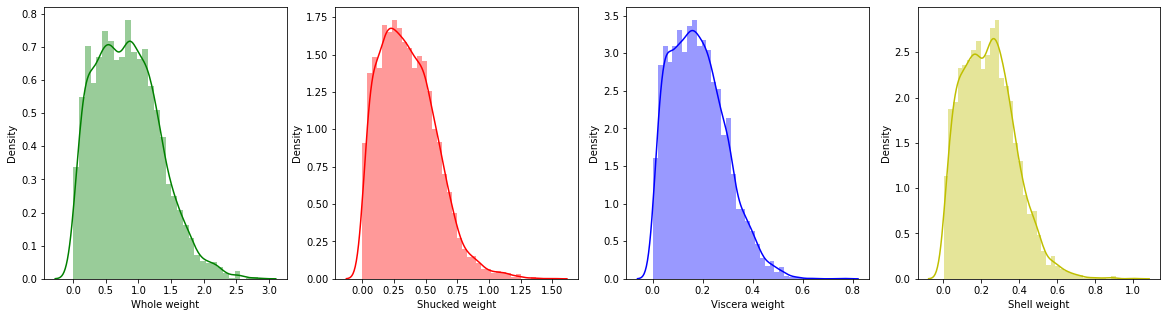

In [267]:
plt.figure(figsize=(20,5))

rows=1
cols=4
ind=1
plt.subplot(rows,cols,ind)
sns.distplot(df['Whole weight'],color="g")
    
ind+=1
plt.subplot(rows,cols, ind)
sns.distplot(df['Shucked weight'],color="r")

ind+=1
plt.subplot(rows,cols, ind)
sns.distplot(df['Viscera weight'],color="b")

ind+=1
plt.subplot(rows,cols, ind)
sns.distplot(df['Shell weight'],color="y")

<AxesSubplot:xlabel='Shell weight'>

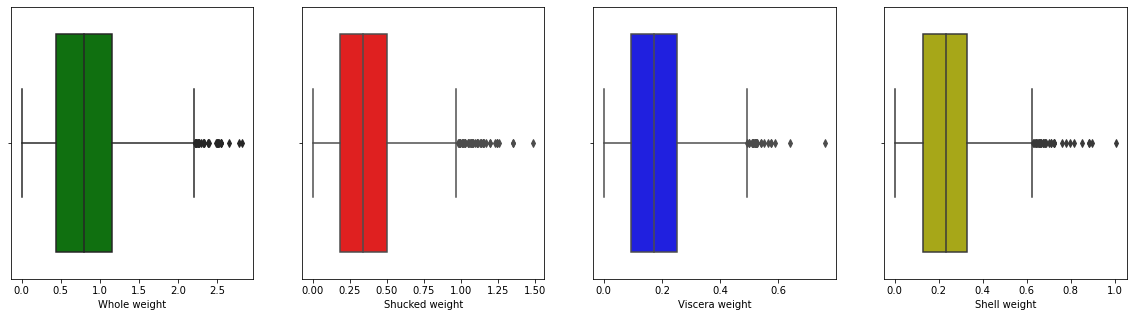

In [268]:
plt.figure(figsize=(20,5))

rows=1
cols=4
ind=1
plt.subplot(rows,cols,ind)
sns.boxplot(df['Whole weight'],color="g")
    
ind+=1
plt.subplot(rows,cols, ind)
sns.boxplot(df['Shucked weight'],color="r")

ind+=1
plt.subplot(rows,cols, ind)
sns.boxplot(df['Viscera weight'],color="b")

ind+=1
plt.subplot(rows,cols, ind)
sns.boxplot(df['Shell weight'],color="y")

<AxesSubplot:xlabel='Shell weight'>

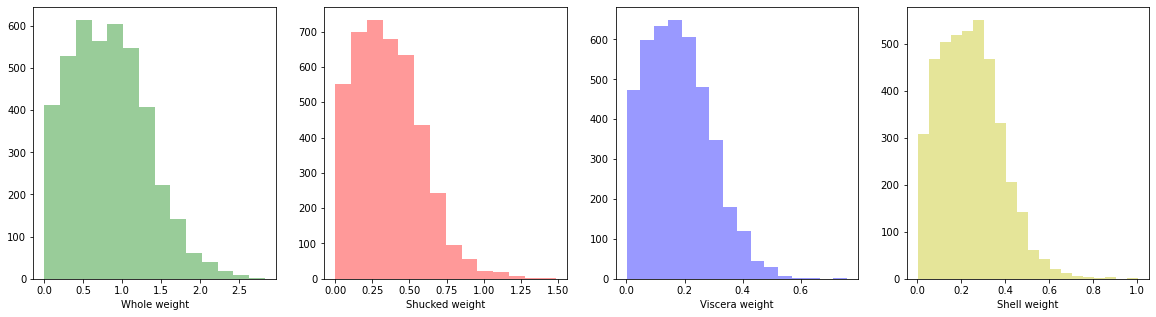

In [269]:
plt.figure(figsize=(20,5))

rows=1
cols=4
ind=1
plt.subplot(rows,cols,ind)
sns.distplot(df['Whole weight'],color="g",kde=False,bins=14)
    
ind+=1
plt.subplot(rows,cols, ind)
sns.distplot(df['Shucked weight'],color="r",kde=False,bins=14)

ind+=1
plt.subplot(rows,cols, ind)
sns.distplot(df['Viscera weight'],color="b",kde=False,bins=16)

ind+=1
plt.subplot(rows,cols, ind)
sns.distplot(df['Shell weight'],color="y",kde=False,bins=20)

#### Lastly, analyzing the Sex attribute which is a categorical variable.

<AxesSubplot:xlabel='Sex', ylabel='count'>

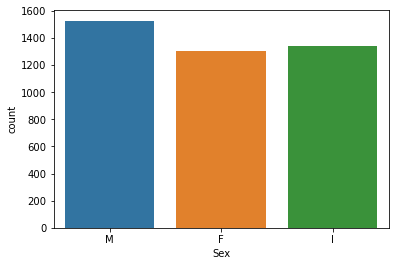

In [270]:
sns.countplot(df["Sex"])

We analyzed the count of each category with a bar plot, and concluded that relative to this attribute, the dataset is balanced.

### Bivariate Analysis

<Figure size 1440x360 with 0 Axes>

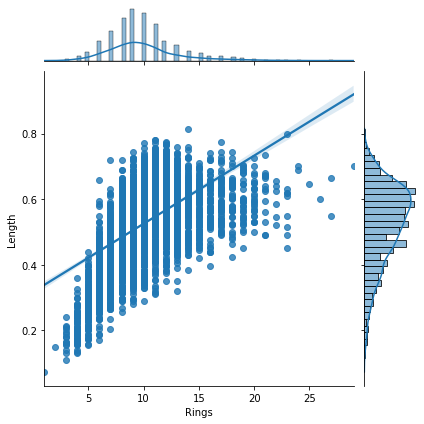

In [271]:
plt.figure(figsize=(20, 5))
sns.jointplot(data=df, x='Rings', y='Length', kind='reg')

We notice an interesting pattern: for lower values of Rings we have concentrated values of Length. As the value of Rings increases, the scatterplot becames larger, and for the highest values of Rings it become disperse.

<Figure size 1440x360 with 0 Axes>

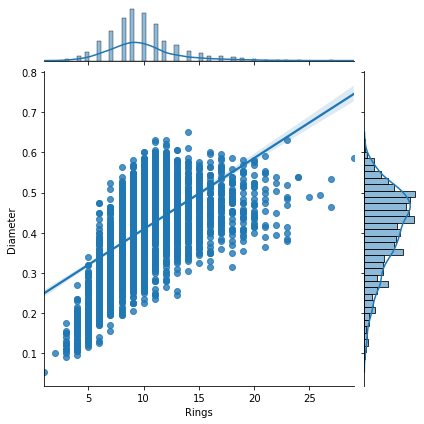

In [272]:
plt.figure(figsize=(20, 5))
sns.jointplot(data=df, x='Rings', y='Diameter', kind='reg')

For Diameter we observe the similar pattern as for Length. 

<Figure size 1440x360 with 0 Axes>

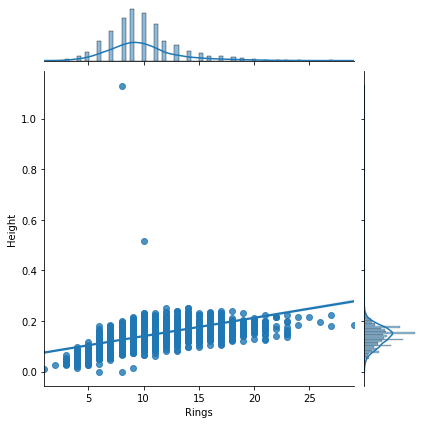

In [273]:
plt.figure(figsize=(20, 5))
sns.jointplot(data=df, x='Rings', y='Height', kind='reg')

Here we see that mostly the Height of abalone lies between 0.1mm to 2.8mm with few outliers. 

<Figure size 1440x360 with 0 Axes>

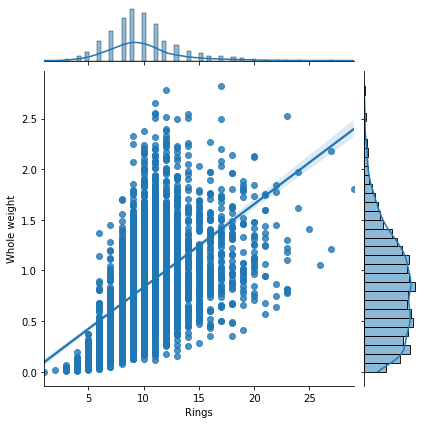

In [274]:
plt.figure(figsize=(20, 5))
sns.jointplot(data=df, x='Rings', y='Whole weight', kind='reg')

<Figure size 1440x360 with 0 Axes>

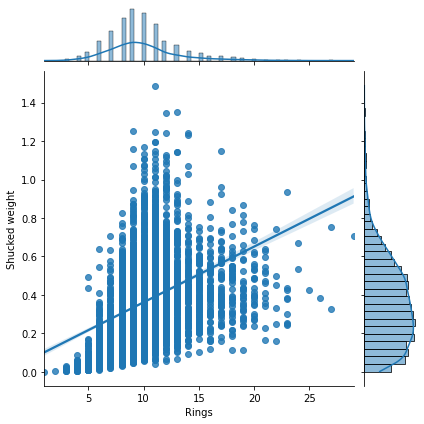

In [275]:
plt.figure(figsize=(20, 5))
sns.jointplot(data=df, x='Rings', y='Shucked weight', kind='reg')

<Figure size 1440x360 with 0 Axes>

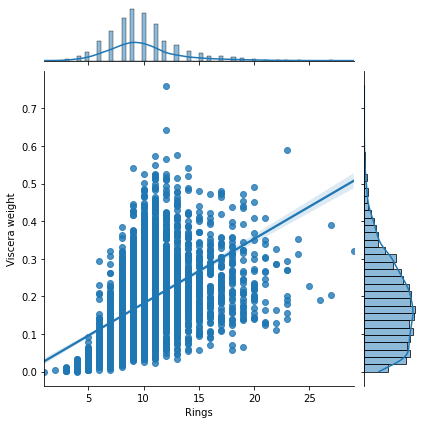

In [276]:
plt.figure(figsize=(20, 5))
sns.jointplot(data=df, x='Rings', y='Viscera weight', kind='reg')

<Figure size 1440x360 with 0 Axes>

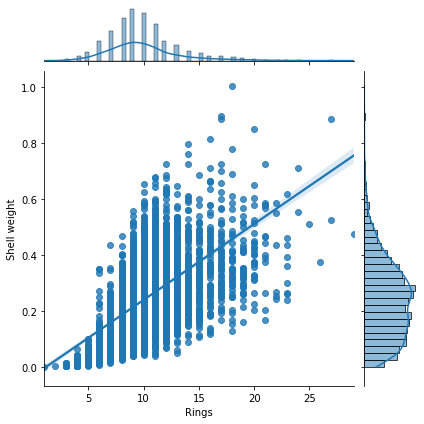

In [277]:
plt.figure(figsize=(20, 5))
sns.jointplot(data=df, x='Rings', y='Shell weight', kind='reg')

From the above plots for weight attributes, we analyze that as the number of Rings increases the scatterplot becomes larger and densed. For the highest values of Rings the scatterplot is scattered.

The above scatterplots for size and weight attributes also suggests that abalone grows in size and weight until a certain age, like near 10 years. After this age their size and age remains stable.

<AxesSubplot:xlabel='Sex', ylabel='Rings'>

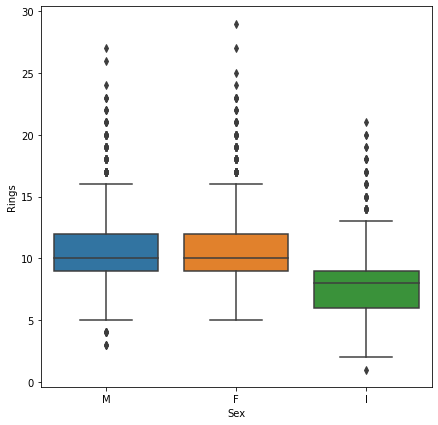

In [278]:
plt.figure(figsize=(7,7))
sns.boxplot(data=df,x="Sex",y="Rings")

From the above boxplots we observe that the median of Rings for the Infant category is lower than the median of Male and Female categories.

<AxesSubplot:xlabel='Sex', ylabel='Height'>

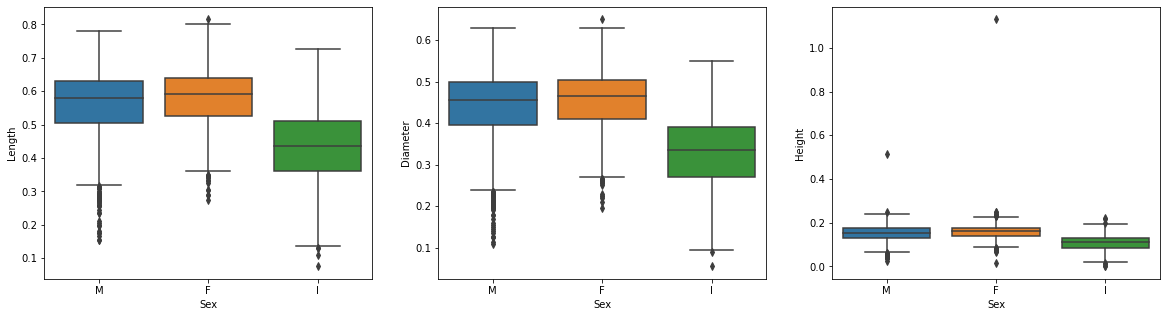

In [279]:
plt.figure(figsize=(20,5))

rows=1
cols=3
ind=1
plt.subplot(rows,cols,ind)
sns.boxplot(data=df,x="Sex",y="Length")
    
ind+=1
plt.subplot(rows,cols, ind)
sns.boxplot(data=df,x="Sex",y="Diameter")

ind+=1
plt.subplot(rows,cols, ind)
sns.boxplot(data=df,x="Sex",y="Height")

For the size attributes too we observe that median of the Length, Diameter and Height for Infant is lower than the median of Male and Female categories. 

<AxesSubplot:xlabel='Sex', ylabel='Shell weight'>

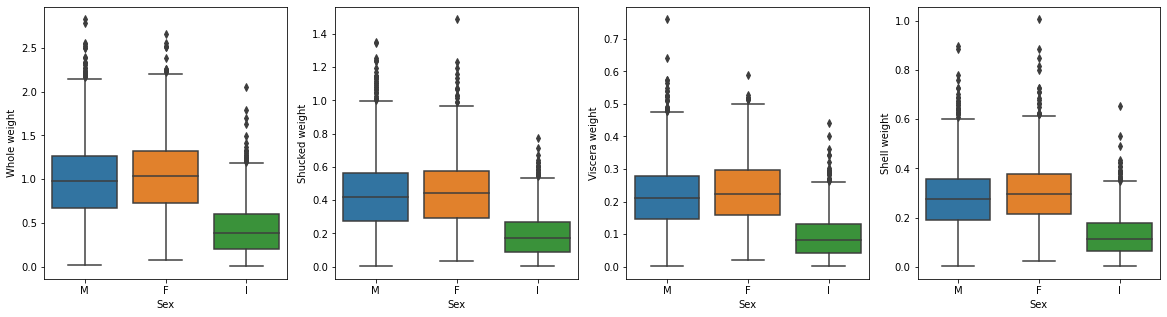

In [280]:
plt.figure(figsize=(20,5))

rows=1
cols=4
ind=1
plt.subplot(rows,cols,ind)
sns.boxplot(data=df,x="Sex",y="Whole weight")
    
ind+=1
plt.subplot(rows,cols, ind)
sns.boxplot(data=df,x="Sex",y="Shucked weight")

ind+=1
plt.subplot(rows,cols, ind)
sns.boxplot(data=df,x="Sex",y="Viscera weight")

ind+=1
plt.subplot(rows,cols, ind)
sns.boxplot(data=df,x="Sex",y="Shell weight")

For the weight attributes we see that median of Female category is slightly higher than that of Male. Its least for the Infant category. Concluding that their age is lower than Male and Female.

## Encoding

As Sex feature is a categorical variable holding string values we need to do encoding to convert them to integer values.

In [281]:
df=pd.get_dummies(df,columns=["Sex"])

In [282]:
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


## Multivariate Analysis

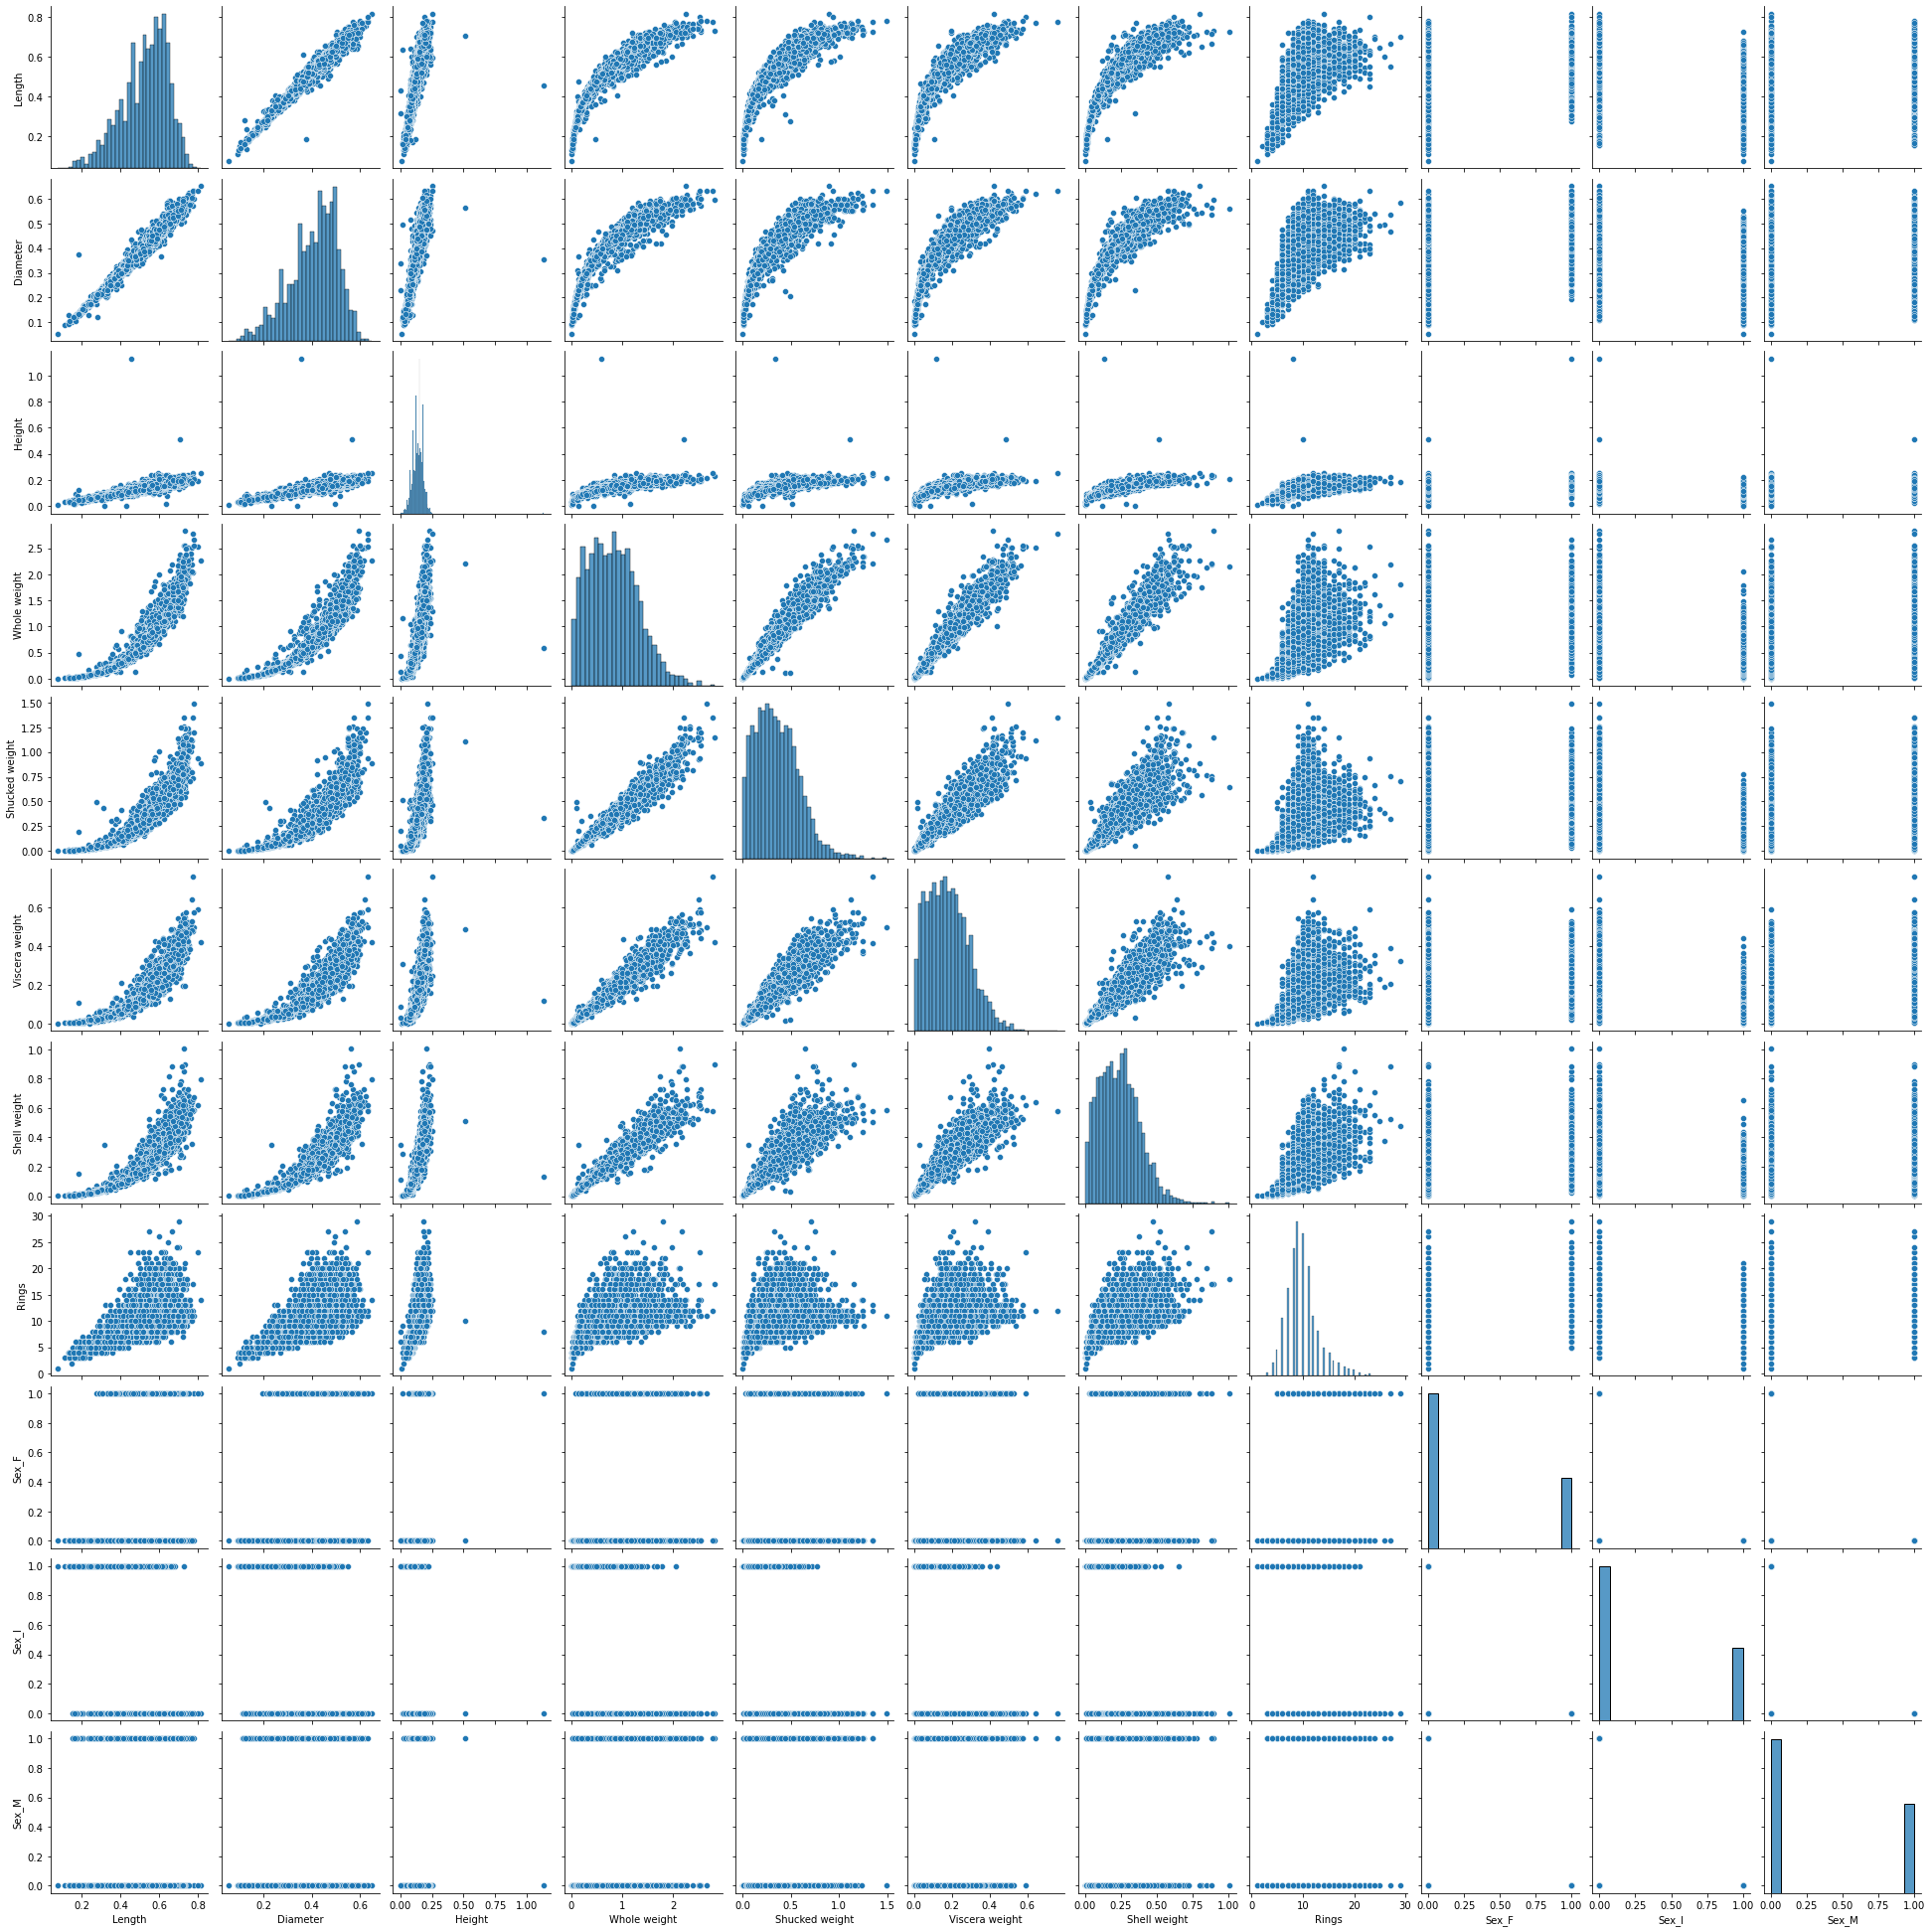

In [283]:
sns.pairplot(df)

Here we observe that weight of the Abalones varies proportional to their sizes. We see target variable is positively related with almost all features except height. And the distribution is skewed for most of the features.

<AxesSubplot:>

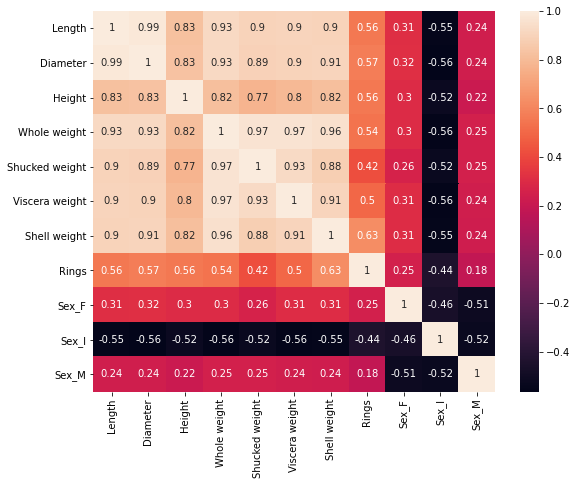

In [284]:
#checking correlation
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(),annot=True)

In [285]:
#Creating function to calculate vif to find the highly correlated columns 
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(dataset):
    vif=pd.DataFrame()
    vif["Features"]=dataset.columns
    vif["VIF_value"]=[variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
    
    return vif

In [286]:
#calling calculate_vif function
features=df.iloc[:,:-1]
calculate_vif(features)

,Features,VIF_value
0,Length,730.383552
1,Diameter,762.767820
2,Height,43.051284
3,Whole weight,436.613841
4,Shucked weight,117.842112
5,Viscera weight,65.504451
6,Shell weight,82.533526
7,Rings,21.707489
8,Sex_F,1.878076
9,Sex_I,2.253547


Here we observe that, Length and Diameter has high value for variance inflation factor as they are highly correlated with each other. Also, variance inflation factor is high for Whole weight and Shucked weight features as correlation for them is also high.

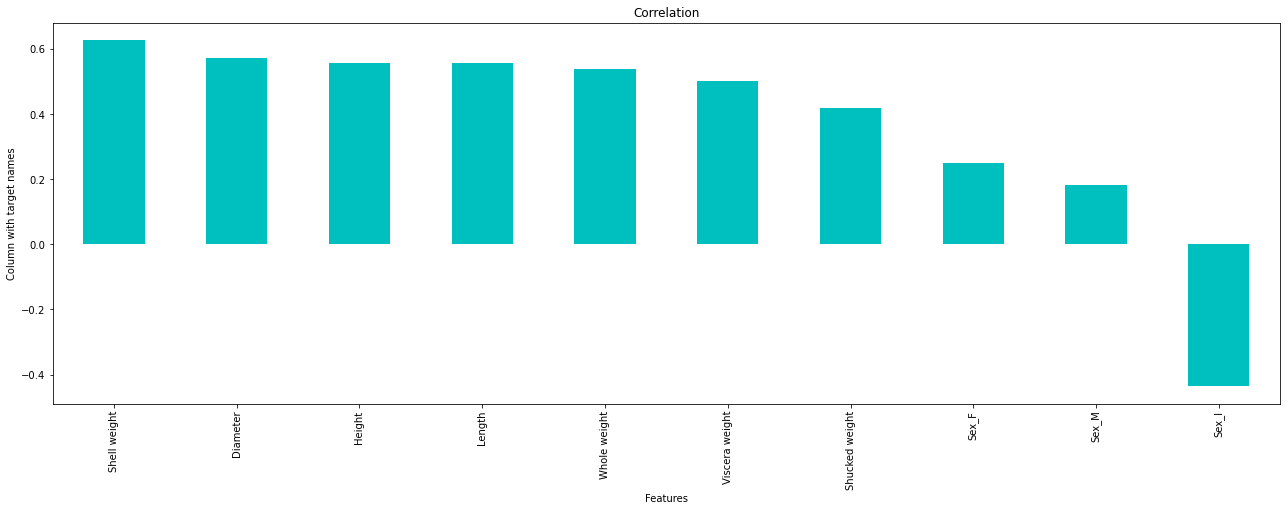

In [287]:
plt.figure(figsize=(22,7))
df.corr()['Rings'].sort_values(ascending=False).drop(['Rings']).plot(kind="bar",color='c')
plt.xlabel("Features")
plt.ylabel("Column with target names")
plt.title("Correlation")
plt.show()

Here we observe that Female and Male abalones are least correlated with Rings.

# Removing Outlier:

In [288]:
#Removing outliers from the independent variables
from scipy.stats import zscore
z=np.abs(zscore(df.drop("Rings",axis=1)))
df_new=df[(z<3).all(axis=1)]

In [289]:
df.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings', 'Sex_F', 'Sex_I', 'Sex_M'],
      dtype='object')

In [290]:
columns=["Length","Diameter","Height","Whole weight","Shucked weight","Viscera weight","Shell weight","Rings"]

#### Plotting boxplots after removing outliers

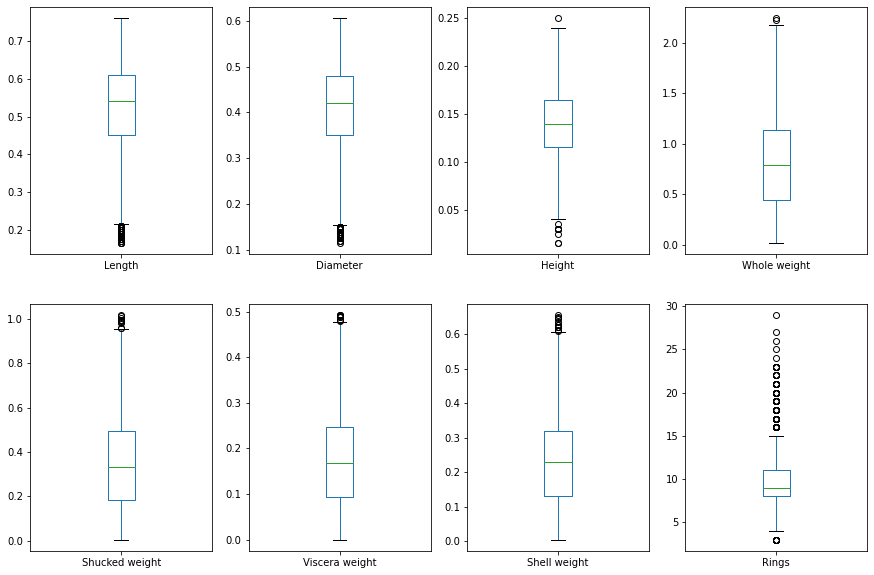

In [291]:
fig,ax=plt.subplots(2,4,figsize=(15,10))
row=col=0
for n,i in enumerate(columns):
    if (n%4==0) & (n>0):
        row+=1
        col=0
    df_new[i].plot(kind="box",ax=ax[row,col])
    col+=1

Even after removing outliers, there are some present.

In [292]:
df.shape

(4177, 11)

In [293]:
df_new.shape

(4084, 11)

After removing outliers, we have 4084 rows and 11 columns.

### Percentage of data loss:

In [294]:
data_loss=(df.shape[0]-df_new.shape[0])/df.shape[0]*100
print("{:.2f}".format(data_loss),"%")

2.23 %


There is 2.23% of data loss with the outlier removal. To some extent outliers are removed.

### Creating X an Y Split

In [295]:
x=df.drop("Rings",axis=1)
y=df["Rings"]

## Checking and Removing Skewness

In [296]:
df.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
Sex_F             0.807302
Sex_I             0.765708
Sex_M             0.557390
dtype: float64

This is the skewness before removing outliers.

In [297]:
x.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Sex_F             0.807302
Sex_I             0.765708
Sex_M             0.557390
dtype: float64

After removing outliers, Skewness is also reduced but not completely.

### Removing skewness:

In [298]:
from sklearn.preprocessing import PowerTransformer

Since negative skewness is present, we cannot use log transformation. Hence, we are using Power Transformer.

In [299]:
PT=PowerTransformer(method='yeo-johnson')
data_PT=PT.fit_transform(x)
X=pd.DataFrame(data_PT,columns=x.columns)

In [300]:
X.skew()

Length           -0.066669
Diameter         -0.065977
Height           -0.115483
Whole weight     -0.003980
Shucked weight    0.027351
Viscera weight    0.039780
Shell weight      0.023390
Sex_F             0.807302
Sex_I             0.765708
Sex_M             0.557390
dtype: float64

Now, the all the skew values are between -0.5 to +0.5. We can ignore the skewness of the categorical columns.

In [301]:
X.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
0,-0.685502,-0.549860,-1.124512,-0.576766,-0.540989,-0.693283,-0.587809,-0.674834,-0.688018,1.316677
1,-1.396344,-1.387333,-1.264396,-1.351761,-1.311662,-1.332953,-1.332420,-0.674834,-0.688018,1.316677
2,-0.070774,0.008537,-0.064823,-0.198099,-0.366116,-0.255135,-0.098262,1.481846,-0.688018,-0.759488
3,-0.797286,-0.549860,-0.320227,-0.571893,-0.591672,-0.547782,-0.544931,-0.674834,-0.688018,1.316677
4,-1.513796,-1.459659,-1.549424,-1.413146,-1.380201,-1.451759,-1.485528,-0.674834,1.453451,-0.759488


### Scaling

Even though there is not much need of scaling, there is a difference between range of values for Sex feature and other columns, hence we are scaling.

In [302]:
from sklearn.preprocessing import MinMaxScaler

In [303]:
MM=MinMaxScaler()
x_scaled=MM.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,0.0,0.0,1.0
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,0.0,0.0,1.0
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,1.0,0.0,0.0
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,0.0,0.0,1.0
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,0.0,1.0,0.0


Now, all the features values are scaled and the model building will not be biased.

As we have only 10 features in our dataset, we will not perform PCA.

# Building the Model

### Creating train_test_split

In [304]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

### Finding the best Random State

In [305]:
from sklearn.ensemble import RandomForestRegressor
maxAcc=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    mod=RandomForestRegressor()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
        
print("Best accuracy is ",maxAcc," on Random State ",maxRS)

Best accuracy is  0.5779381201821276  on Random State  12


Using the best Random State to create new train_test_split.

In [306]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [307]:
#Importing the algorithmns to build models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso

### 1.LinearRegression

In [308]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred=LR.predict(x_test)

MAE=mean_absolute_error(pred,y_test)
MSE=mean_squared_error(pred,y_test)
RMSE=np.sqrt(MSE)
r2=r2_score(y_test,pred)

print("Mean absolute error:",MAE)
print("Mean squared error:",MSE)
print("Root Mean squared error:",RMSE)
print("R2 Score:",r2)

Mean absolute error: 1.5324105452438725
Mean squared error: 4.481490271781557
Root Mean squared error: 2.116953063197566
R2 Score: 0.5722374523647895


### 2.Support Vector Regressor 

In [309]:
SV=SVR()
SV.fit(x_train,y_train)
pred=SV.predict(x_test)

MAE=mean_absolute_error(pred,y_test)
MSE=mean_squared_error(pred,y_test)
RMSE=np.sqrt(MSE)
r2=r2_score(y_test,pred)

print("Mean absolute error:",MAE)
print("Mean squared error:",MSE)
print("Root Mean squared error:",RMSE)
print("R2 Score:",r2)

Mean absolute error: 1.5434389585464412
Mean squared error: 5.2530635412252416
Root Mean squared error: 2.2919562694836135
R2 Score: 0.49859004326459044


### 3.RandomForestRegressor

In [310]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred=RFR.predict(x_test)

MAE=mean_absolute_error(pred,y_test)
MSE=mean_squared_error(pred,y_test)
RMSE=np.sqrt(MSE)
r2=r2_score(y_test,pred)

print("Mean absolute error:",MAE)
print("Mean squared error:",MSE)
print("Root Mean squared error:",RMSE)
print("R2 Score:",r2)

Mean absolute error: 1.50896331738437
Mean squared error: 4.40845023923445
Root Mean squared error: 2.0996309769181942
R2 Score: 0.5792091935729411


### 4.DecisionTreeRegressor

In [311]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred=DTR.predict(x_test)

MAE=mean_absolute_error(pred,y_test)
MSE=mean_squared_error(pred,y_test)
RMSE=np.sqrt(MSE)
r2=r2_score(y_test,pred)

print("Mean absolute error:",MAE)
print("Mean squared error:",MSE)
print("Root Mean squared error:",RMSE)
print("R2 Score:",r2)

Mean absolute error: 2.0757575757575757
Mean squared error: 8.724880382775119
Root Mean squared error: 2.953790849531347
R2 Score: 0.16720179359785214


Here, we observe that RandomForestRegressor is giving the highest R2 score. But we all know, it may or may not be due to overfitting, we are not sure about this. So we cannot confirm it as the best model. To be sure about the best model, we will go for the Cross Validation Score.

### Cross Validation Score

In [312]:
from sklearn.model_selection import cross_val_score

In [313]:
print(cross_val_score(LR,x,y,cv=5).mean())

0.41851952035494666


In [314]:
print(cross_val_score(SV,x,y,cv=5).mean())

0.43575495382183327


In [315]:
print(cross_val_score(RFR,x,y,cv=5).mean())

0.44375659057211464


In [316]:
print(cross_val_score(DTR,x,y,cv=5).mean())

-0.14221947314604105


From the above cross validation score, we can conclude that SVR is our best model with the least difference.

### Hyper Parameter Tuning

Now, let's apply Hyper Paramter Tuning on the best model to improve the accuracy score.

In [317]:
from sklearn.model_selection import GridSearchCV

In [318]:
parameters={'kernel':['linear','poly','rbf'],
           'gamma':['scale','auto'],
           'degree':[2,3,4],
           'C':[1.0,1.1,1.3,1.5,2.0]}

In [319]:
GCV=GridSearchCV(SVR(),parameters,cv=5)

In [320]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1.0, 1.1, 1.3, 1.5, 2.0], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']})

In [321]:
GCV.best_params_

{'C': 2.0, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}

In [322]:
Final_mod=SVR(C=2.0,degree=4,gamma="scale",kernel="poly")
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

56.054457578244296


Here we observe that we are not getting a good score for our model. It could be because of the observed multi-collinearity. So lets try dropping a column which is highly correlated with an independent variable and least correlated with the target variable.

We know that "Shucked weight" is least correlated with target variable "Rings". So lets try dropping it and then check the score.

In [323]:
#checking the variance inflation factor
calculate_vif(x)

,Features,VIF_value
0,Length,40.945763
1,Diameter,42.379841
2,Height,3.581369
3,Whole weight,109.768710
4,Shucked weight,28.550546
5,Viscera weight,17.445012
6,Shell weight,21.263272
7,Sex_F,16.299023
8,Sex_I,13.184643
9,Sex_M,17.944542


In [324]:
#Dropping Length column
X_new=x.drop(["Length"],axis=1)
calculate_vif(X_new)

,Features,VIF_value
0,Diameter,8.355832
1,Height,3.577715
2,Whole weight,109.754856
3,Shucked weight,28.386046
4,Viscera weight,17.289367
5,Shell weight,21.242202
6,Sex_F,14.973136
7,Sex_I,11.571912
8,Sex_M,16.366071


Creating train_test_Split with new dataset.

In [325]:
x_train,x_test,y_train,y_test=train_test_split(X_new,y,test_size=0.30,random_state=maxRS)

### 1.LinearRegression

In [326]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred=LR.predict(x_test)

MAE=mean_absolute_error(pred,y_test)
MSE=mean_squared_error(pred,y_test)
RMSE=np.sqrt(MSE)
r2=r2_score(y_test,pred)

print("Mean absolute error:",MAE)
print("Mean squared error:",MSE)
print("Root Mean squared error:",RMSE)
print("R2 Score:",r2)

Mean absolute error: 1.5313559110845294
Mean squared error: 4.481554971357282
Root Mean squared error: 2.1169683444391136
R2 Score: 0.5722312767281901


### 2.SVR

In [327]:
SV=SVR()
SV.fit(x_train,y_train)
pred=SV.predict(x_test)

MAE=mean_absolute_error(pred,y_test)
MSE=mean_squared_error(pred,y_test)
RMSE=np.sqrt(MSE)
r2=r2_score(y_test,pred)

print("Mean absolute error:",MAE)
print("Mean squared error:",MSE)
print("Root Mean squared error:",RMSE)
print("R2 Score:",r2)

Mean absolute error: 1.5465585510051763
Mean squared error: 5.240753494662012
Root Mean squared error: 2.289269205371446
R2 Score: 0.499765049023847


### 3.RandomForestRegressor

In [328]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred=RFR.predict(x_test)

MAE=mean_absolute_error(pred,y_test)
MSE=mean_squared_error(pred,y_test)
RMSE=np.sqrt(MSE)
r2=r2_score(y_test,pred)

print("Mean absolute error:",MAE)
print("Mean squared error:",MSE)
print("Root Mean squared error:",RMSE)
print("R2 Score:",r2)

Mean absolute error: 1.5118022328548646
Mean squared error: 4.389062519936204
Root Mean squared error: 2.095008954619575
R2 Score: 0.5810597699876829


In [329]:
print(cross_val_score(LR,X_new,y,cv=5).mean())

0.41372320431990606


In [330]:
print(cross_val_score(SV,X_new,y,cv=5).mean())

0.4366252343331848


In [331]:
print(cross_val_score(RFR,X_new,y,cv=5).mean())

0.44166611134340916


In [332]:
parameters={'kernel':['linear','poly','rbf'],
           'gamma':['scale','auto'],
           'degree':[2,3,4],
           'C':[1.0,1.1,1.3,1.5,2.0]}

In [333]:
GCV=GridSearchCV(SVR(),parameters,cv=5)

In [334]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1.0, 1.1, 1.3, 1.5, 2.0], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']})

In [335]:
GCV.best_params_

{'C': 2.0, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}

In [336]:
Final_model=SVR(C=2.0,degree=4,gamma="scale",kernel="poly")
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=r2_score(y_test,pred)
print(acc*100)

55.783041842067725


We tried removing the column with high independent column correlation. However, the score did not improve. So we will stick to the first model.

### Saving the Model

In [337]:
import joblib
joblib.dump(Final_mod,"Abalone.pkl")

['Abalone.pkl']